In [1]:
import pandas as pd

DATA_PATH = "LoLesports_data/"

teams_train = pd.read_csv(f"{DATA_PATH}teams_train.csv")
teams_test = pd.read_csv(f"{DATA_PATH}teams_test.csv")
players_train = pd.read_csv(f"{DATA_PATH}players_train.csv")
players_test = pd.read_csv(f"{DATA_PATH}players_test.csv")

teams_train_target = pd.read_csv(f"{DATA_PATH}teams_train_target.csv")
teams_test_target = pd.read_csv(f"{DATA_PATH}teams_test_target.csv")
players_train_target = pd.read_csv(f"{DATA_PATH}players_train_target.csv")
players_test_target = pd.read_csv(f"{DATA_PATH}players_test_target.csv")

# 컬럼 추가

## 상대 팀 추가

In [2]:
temp_opp_teams = teams_train.groupby("gameid")["teamname"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamname")
teams_train = pd.concat([teams_train, temp_opp_teams], axis=1)
temp_opp_teams = teams_test.groupby("gameid")["teamname"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamname")
teams_test = pd.concat([teams_test, temp_opp_teams], axis=1)

temp_opp_players = players_train.groupby("gameid")["teamname"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamname")
players_train = pd.concat([players_train, temp_opp_players], axis=1)
temp_opp_players = players_test.groupby("gameid")["teamname"].transform(lambda x: x.iloc[::-1].values).to_frame("opp_teamname")
players_test = pd.concat([players_test, temp_opp_players], axis=1)

## 날짜 추가

In [3]:
teams_train["date"] = pd.to_datetime(teams_train["date"])
teams_test["date"] = pd.to_datetime(teams_test["date"])

players_train["date"] = pd.to_datetime(players_train["date"])
players_test["date"] = pd.to_datetime(players_test["date"])

teams_train["year"] = teams_train["date"].dt.year
teams_train["month"] = teams_train["date"].dt.month
teams_train["day"] = teams_train["date"].dt.day

players_train["year"] = players_train["date"].dt.year
players_train["month"] = players_train["date"].dt.month
players_train["day"] = players_train["date"].dt.day

teams_test["year"] = teams_test["date"].dt.year
teams_test["month"] = teams_test["date"].dt.month
teams_test["day"] = teams_test["date"].dt.day

players_test["year"] = players_test["date"].dt.year
players_test["month"] = players_test["date"].dt.month
players_test["day"] = players_test["date"].dt.day

## 데이터 타입 변경

In [4]:
teams_train["league"] = teams_train["league"].astype("category")
teams_train["split"] = teams_train["split"].astype("category")
teams_train["teamname"] = teams_train["teamname"].astype("category")
teams_train["opp_teamname"] = teams_train["opp_teamname"].astype("category")

teams_test["league"] = teams_test["league"].astype("category")
teams_test["split"] = teams_test["split"].astype("category")
teams_test["teamname"] = teams_test["teamname"].astype("category")
teams_test["opp_teamname"] = teams_test["opp_teamname"].astype("category")

players_train["league"] = players_train["league"].astype("category")
players_train["split"] = players_train["split"].astype("category")
players_train["teamname"] = players_train["teamname"].astype("category")
players_train["playername"] = players_train["playername"].astype("category")
players_train["opp_teamname"] = players_train["opp_teamname"].astype("category")

players_test["league"] = players_test["league"].astype("category")
players_test["split"] = players_test["split"].astype("category")
players_test["teamname"] = players_test["teamname"].astype("category")
players_test["playername"] = players_test["playername"].astype("category")
players_test["opp_teamname"] = players_test["opp_teamname"].astype("category")

In [5]:
teams_train.head()

,gameid,league,split,playoffs,date,game,patch,side,teamname,ban1,...,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,opp_teamname,year,month,day
0,ESPORTSTMNT01_2700815,LCK,Spring,0,2022-01-12 06:20:00,1,12.01,Blue,DRX,Diana,...,4.0,7.0,1.0,1.0,1.0,4.0,BNK FEARX,2022,1,12
1,ESPORTSTMNT01_2700815,LCK,Spring,0,2022-01-12 06:20:00,1,12.01,Red,BNK FEARX,Renekton,...,1.0,1.0,4.0,4.0,7.0,1.0,DRX,2022,1,12
2,ESPORTSTMNT01_2690695,LCK,Spring,0,2022-01-12 09:02:00,2,12.01,Blue,DRX,Diana,...,2.0,5.0,4.0,4.0,5.0,2.0,BNK FEARX,2022,1,12
3,ESPORTSTMNT01_2690695,LCK,Spring,0,2022-01-12 09:02:00,2,12.01,Red,BNK FEARX,Renekton,...,4.0,5.0,2.0,2.0,5.0,4.0,DRX,2022,1,12
4,ESPORTSTMNT01_2690705,LCK,Spring,0,2022-01-12 10:07:00,1,12.01,Blue,T1,Lee Sin,...,3.0,2.0,1.0,1.0,1.0,3.0,Kwangdong Freecs,2022,1,12


# 특성 추가

## df에 포함되어 있는 특성을 이용한 토대 작성

In [6]:
pre_game_features = [
    "gameid",
    "patch",
    "side",
    "league",
    "teamname",
    "opp_teamname",
    "ban1",
    "ban2",
    "ban3",
    "ban4",
    "ban5",
    "pick1",
    "pick2",
    "pick3",
    "pick4",
    "pick5",
    "year",
    "month",
    "day",
]

train_ft = teams_train[pre_game_features]
test_ft = teams_test[pre_game_features]

train_ft.shape, test_ft.shape

((9913, 19), (2324, 19))

### 팀별 최근 10경기 지표 계산, 상대팀 최근 10경기 지표 계산

In [7]:
stats_columns = [
    "result",
    "gamelength",
    "kills",
    "deaths",
    "assists",
    "firstblood",
    "team kpm",
    "ckpm",
    "firstdragon",
    "firstherald",
    "void_grubs",
    "firstbaron",
    "firsttower",
    "towers",
    "firstmidtower",
    "firsttothreetowers",
    "turretplates",
    "inhibitors",
    "damagetochampions",
    "dpm",
    "damagetakenperminute",
    "damagemitigatedperminute",
    "wardsplaced",
    "wpm",
    "wardskilled",
    "wcpm",
    "controlwardsbought",
    "visionscore",
    "vspm",
]

In [8]:
# 팀별 최근 승률 계산을 위한 데이터 정렬
temp_train = teams_train.sort_values(['teamname', 'year', 'month', 'day']).reset_index(drop=True)
temp_test = teams_test.sort_values(['teamname', 'year', 'month', 'day']).reset_index(drop=True)

# 팀별 최근 10경기 평균 계산
for col in stats_columns:
    # 승률 계산
    recent10_train = temp_train.groupby('teamname', observed=True)[col].transform(
        lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)
    )
    train_ft = train_ft.assign(**{f'recent10_{col}': recent10_train})
    
    # 테스트 데이터의 지표 계산을 위해 훈련 데이터와 테스트 데이터 결합
    combined_data = pd.concat([temp_train, temp_test], ignore_index=True).sort_values(['teamname', 'year', 'month', 'day'])
    recent10_combined = combined_data.groupby('teamname', observed=True)[col].transform(
        lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)
    )
    combined_data = combined_data.assign(**{f'recent10_{col}': recent10_combined})

    # 테스트 데이터의 지표 업데이트
    recent10_test = combined_data.tail(len(temp_test))[f'recent10_{col}'].values
    test_ft = test_ft.assign(**{f'recent10_{col}': recent10_test})
    
    # 상대팀 최근 지표 계산
    merged_train = train_ft.merge(
        train_ft[['teamname', 'year', 'month', 'day', f'recent10_{col}']], 
        left_on=['opp_teamname', 'year', 'month', 'day'],
        right_on=['teamname', 'year', 'month', 'day'],
        suffixes=('', '_opp')
    )
    train_ft = train_ft.assign(**{f'opp_recent10_{col}': merged_train[f'recent10_{col}_opp']})
    
    merged_test = test_ft.merge(
        combined_data[['teamname', 'year', 'month', 'day', f'recent10_{col}']], 
        left_on=['opp_teamname', 'year', 'month', 'day'],
        right_on=['teamname', 'year', 'month', 'day'],
        suffixes=('', '_opp')
    )
    test_ft = test_ft.assign(**{f'opp_recent10_{col}': merged_test[f'recent10_{col}_opp']})
    
    # NaN값 처리 (첫 경기인 경우)
    default_value = 0.5 if col == 'result' else 0
    train_ft = train_ft.assign(**{
        f'recent10_{col}': train_ft[f'recent10_{col}'].fillna(default_value),
        f'opp_recent10_{col}': train_ft[f'opp_recent10_{col}'].fillna(default_value)
    })
    test_ft = test_ft.assign(**{
        f'recent10_{col}': test_ft[f'recent10_{col}'].fillna(default_value),
        f'opp_recent10_{col}': test_ft[f'opp_recent10_{col}'].fillna(default_value)
    })
    
    # 특성 리스트에 새로운 지표 추가
    pre_game_features.extend([f'recent10_{col}', f'opp_recent10_{col}'])

# 입력 데이터 업데이트
train_ft = train_ft[pre_game_features]
test_ft = test_ft[pre_game_features]

train_ft.shape, test_ft.shape

((9913, 77), (2324, 77))

In [9]:
train_ft.head()

,gameid,patch,side,league,teamname,opp_teamname,ban1,ban2,ban3,ban4,...,recent10_wardskilled,opp_recent10_wardskilled,recent10_wcpm,opp_recent10_wcpm,recent10_controlwardsbought,opp_recent10_controlwardsbought,recent10_visionscore,opp_recent10_visionscore,recent10_vspm,opp_recent10_vspm
0,ESPORTSTMNT01_2700815,12.01,Blue,LCK,DRX,BNK FEARX,Diana,Caitlyn,Twisted Fate,LeBlanc,...,0.000000,35.000000,0.000000,1.316600,0.00,30.0,0.000000,207.000000,0.000000,7.786800
1,ESPORTSTMNT01_2700815,12.01,Red,LCK,BNK FEARX,DRX,Renekton,Lee Sin,Leona,Jayce,...,35.000000,45.666667,1.316600,1.464567,30.00,40.0,207.000000,250.333333,7.786800,8.068033
2,ESPORTSTMNT01_2690695,12.01,Blue,LCK,DRX,BNK FEARX,Diana,Caitlyn,Yuumi,Samira,...,42.000000,0.000000,1.402250,0.000000,38.50,0.0,242.500000,0.000000,8.114050,0.000000
3,ESPORTSTMNT01_2690695,12.01,Red,LCK,BNK FEARX,DRX,Renekton,Lee Sin,Twisted Fate,Viktor,...,45.666667,42.000000,1.464567,1.402250,40.00,38.5,250.333333,242.500000,8.068033,8.114050
4,ESPORTSTMNT01_2690705,12.01,Blue,LCK,T1,Kwangdong Freecs,Lee Sin,Ryze,Viktor,LeBlanc,...,49.500000,35.000000,1.612750,1.316600,40.75,30.0,247.000000,207.000000,8.049350,7.786800


### 상대 전적

In [10]:
# 팀별 맞대결 기록을 시간순으로 계산
h2h_records = {}

# 훈련 데이터와 테스트 데이터 결합 후 시간순 정렬
combined_data = pd.concat([teams_train, teams_test], ignore_index=True)
combined_data = combined_data.sort_values(['year', 'month', 'day'])

# 각 경기마다 이전 맞대결 기록 계산
h2h_winrates = []

for idx, match in combined_data.iterrows():
    team1, team2 = match['teamname'], match['opp_teamname']
    year = match['year']
    key = (team1, team2, year)
    
    # 현재 시점까지의 맞대결 기록 저장
    if key not in h2h_records:
        h2h_records[key] = {'wins': 0, 'total': 0}
        h2h_winrates.append(0.5)  # 첫 맞대결인 경우 0.5 반환
    else:
        record = h2h_records[key]
        h2h_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
    # 현재 경기 결과 반영
    result = match['result']
    h2h_records[key]['total'] += 1
    if result == 1:
        h2h_records[key]['wins'] += 1
        
    # 상대팀 관점의 기록도 업데이트
    key_reverse = (team2, team1, year)
    if key_reverse not in h2h_records:
        h2h_records[key_reverse] = {'wins': 0, 'total': 0}
    h2h_records[key_reverse]['total'] += 1
    if result == 0:
        h2h_records[key_reverse]['wins'] += 1

# 계산된 승률을 훈련/테스트 데이터에 할당
train_ft['h2h_winrate'] = h2h_winrates[:len(teams_train)]
test_ft['h2h_winrate'] = h2h_winrates[len(teams_train):]

# 특성 리스트에 h2h_winrate 추가
pre_game_features.append('h2h_winrate')

# 입력 데이터 업데이트
train_ft = train_ft[pre_game_features]
test_ft = test_ft[pre_game_features]

train_ft.shape, test_ft.shape

((9913, 78), (2324, 78))

### 각 팀의 리그별 승률

In [11]:
# 팀별 리그 승률 기록을 저장할 딕셔너리
league_records = {}
league_winrates = []

# 날짜순으로 정렬
combined_data = pd.concat([teams_train, teams_test], ignore_index=True)
combined_data = combined_data.sort_values('date')

# 훈련 데이터에서 팀별 리그 승률 계산
for idx, match in combined_data.iterrows():
    team = match['teamname']
    league = match['league']
    year = match['year']
    key = (team, league, year)
    
    # 현재 시점까지의 리그 승률 계산
    if key not in league_records:
        league_records[key] = {'wins': 0, 'total': 0}
        league_winrates.append(0.5)  # 첫 경기인 경우 0.5 반환
    else:
        record = league_records[key]
        league_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
    # 현재 경기 결과 반영
    result = match['result']
    league_records[key]['total'] += 1
    if result == 1:
        league_records[key]['wins'] += 1

# 계산된 승률을 훈련/테스트 데이터에 할당
train_ft['league_winrate'] = league_winrates[:len(teams_train)]
test_ft['league_winrate'] = league_winrates[len(teams_train):]

# 특성 리스트에 league_winrate 추가
pre_game_features.append('league_winrate')

# 입력 데이터 업데이트
train_ft = train_ft[pre_game_features]
test_ft = test_ft[pre_game_features]

train_ft.shape, test_ft.shape

((9913, 79), (2324, 79))

### 각 패치 버전 사이드별 승률

In [12]:
# # 날짜별 패치 버전의 사이드 승률 계산
# patch_side_records = {}
# patch_side_winrates = []

# # 날짜순으로 정렬
# train_ft_sorted = train_ft.sort_values('date')
# test_ft_sorted = test_ft.sort_values('date')

# # 훈련 데이터에서 날짜별 패치/사이드 승률 계산
# for idx, match in train_ft_sorted.iterrows():
#     patch = match['patch']
#     side = match['side']
#     key = (patch, side)
    
#     # 현재 시점까지의 패치/사이드별 승률 계산
#     if key not in patch_side_records:
#         patch_side_records[key] = {'wins': 0, 'total': 0}
#         patch_side_winrates.append(0.5)  # 첫 경기인 경우 0.5 반환
#     else:
#         record = patch_side_records[key]
#         patch_side_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
#     # 현재 경기 결과 반영
#     result = match['result']
#     patch_side_records[key]['total'] += 1
#     if result == 1:
#         patch_side_records[key]['wins'] += 1

# # 테스트 데이터의 패치/사이드별 승률 계산
# for idx, match in test_ft_sorted.iterrows():
#     patch = match['patch']
#     side = match['side']
#     key = (patch, side)
    
#     # 현재 시점까지의 패치/사이드별 승률 계산
#     if key not in patch_side_records:
#         patch_side_records[key] = {'wins': 0, 'total': 0}
#         patch_side_winrates.append(0.5)  # 첫 경기인 경우 0.5 반환
#     else:
#         record = patch_side_records[key]
#         patch_side_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
#     # 테스트 데이터에서도 현재 경기 결과 반영
#     result = match['result']
#     patch_side_records[key]['total'] += 1
#     if result == 1:
#         patch_side_records[key]['wins'] += 1

# # 원래 인덱스 순서로 승률 재정렬
# winrate_df = pd.DataFrame({
#     'idx': list(teams_train.index) + list(teams_test.index),
#     'winrate': patch_side_winrates
# }).set_index('idx')
# patch_side_winrates = winrate_df['winrate'].tolist()

# # 계산된 승률을 훈련/테스트 데이터에 할당
# train_ft['patch_side_winrate'] = patch_side_winrates[:len(teams_train)]
# test_ft['patch_side_winrate'] = patch_side_winrates[len(teams_train):]

# # 특성 리스트에 patch_side_winrate 추가
# pre_game_features.append('patch_side_winrate')

# # 입력 데이터 업데이트
# train_ft = train_ft[pre_game_features]
# test_ft = test_ft[pre_game_features]

# train_ft.shape, test_ft.shape

### 팀별 정규시즌/플레이오프 승률
- MSI, Worlds에 플레이오프 구분 안되어있어 생략

In [13]:
# # 팀별 플레이오프 승률 계산을 위한 딕셔너리 초기화
# playoff_records = {}

# # 훈련 데이터의 팀별/연도별 플레이오프 승률 계산
# playoff_winrates = []

# for idx, match in teams_train.iterrows():
#     team = match['teamname']
#     year = match['year']
#     key = (team, year)
    
#     # 현재 시점까지의 팀별/연도별 플레이오프 승률 계산
#     if key not in playoff_records:
#         playoff_records[key] = {'wins': 0, 'total': 0}
#         playoff_winrates.append(0.5)  # 첫 경기인 경우 0.5 반환
#     else:
#         record = playoff_records[key]
#         playoff_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
#     # 현재 경기 결과 반영
#     if match['playoffs'] == 1:  # 플레이오프 경기인 경우만
#         playoff_records[key]['total'] += 1
#         if match['result'] == 1:
#             playoff_records[key]['wins'] += 1

# # 테스트 데이터의 팀별/연도별 플레이오프 승률 계산
# for idx, match in teams_test.iterrows():
#     team = match['teamname']
#     year = match['year']
#     key = (team, year)
    
#     # 현재 시점까지의 팀별/연도별 플레이오프 승률 계산
#     if key not in playoff_records:
#         playoff_records[key] = {'wins': 0, 'total': 0}
#         playoff_winrates.append(0.5)  # 첫 경기인 경우 0.5 반환
#     else:
#         record = playoff_records[key]
#         playoff_winrates.append(record['wins'] / record['total'] if record['total'] > 0 else 0.5)
    
#     # 테스트 데이터에서도 현재 경기 결과 반영
#     if match['playoffs'] == 1:  # 플레이오프 경기인 경우만
#         playoff_records[key]['total'] += 1
#         if match['result'] == 1:
#             playoff_records[key]['wins'] += 1

# # 원래 인덱스 순서로 승률 재정렬
# winrate_df = pd.DataFrame({
#     'idx': list(teams_train.index) + list(teams_test.index),
#     'winrate': playoff_winrates
# }).set_index('idx')
# playoff_winrates = winrate_df['winrate'].tolist()

# # 계산된 승률을 훈련/테스트 데이터에 할당
# teams_train['playoff_winrate'] = playoff_winrates[:len(teams_train)]
# teams_test['playoff_winrate'] = playoff_winrates[len(teams_train):]

# # 특성 리스트에 playoff_winrate 추가
# pre_game_features.append('playoff_winrate')

# # 입력 데이터 업데이트
# train_ft = teams_train[pre_game_features]
# test_ft = teams_test[pre_game_features]

# train_ft.shape, test_ft.shape

# 인코딩

In [14]:
train_ft["side"] = train_ft["side"].map({"Blue": 0, "Red": 1})
test_ft["side"] = test_ft["side"].map({"Blue": 0, "Red": 1})

# players_train["side"] = players_train["side"].map({"Blue": 0, "Red": 1})
# players_test["side"] = players_test["side"].map({"Blue": 0, "Red": 1})

In [15]:
from sklearn.preprocessing import LabelEncoder

champion_columns_players = ['champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5']
champion_columns_teams = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

champions = pd.concat([
    train_ft[champion_columns_teams],
    test_ft[champion_columns_teams],
    # players_train[champion_columns_players],
    # players_test[champion_columns_players],
]).stack().unique()

champions_df = pd.DataFrame({'champion': champions})
champions_df = champions_df.dropna().reset_index(drop=True)

le = LabelEncoder()
champions_df['champion_encoded'] = le.fit_transform(champions_df['champion'])

for col in champion_columns_teams:
    train_ft[col] = le.transform(train_ft[col])
    test_ft[col] = le.transform(test_ft[col])
    
# for col in champion_columns_players:
#     players_train[col] = le.transform(players_train[col])
#     players_test[col] = le.transform(players_test[col])

In [16]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(handle_unknown='ignore')
# players_train[ohe.get_feature_names_out()] = ohe.fit_transform(players_train[["position"]]).toarray()
# players_test[ohe.get_feature_names_out()] = ohe.transform(players_test[["position"]]).toarray()

# players_train.drop(columns=["position"], inplace=True)
# players_test.drop(columns=["position"], inplace=True)

In [17]:
train_ft.select_dtypes("object").columns, test_ft.select_dtypes("object").columns

(Index(['gameid'], dtype='object'), Index(['gameid'], dtype='object'))

# 스케일링

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# players_train[players_train.select_dtypes("number").columns] = scaler.fit_transform(players_train[players_train.select_dtypes("number").columns])
# players_test[players_test.select_dtypes("number").columns] = scaler.transform(players_test[players_test.select_dtypes("number").columns])

train_ft[train_ft.select_dtypes("number").columns] = scaler.fit_transform(train_ft[train_ft.select_dtypes("number").columns])
test_ft[test_ft.select_dtypes("number").columns] = scaler.transform(test_ft[test_ft.select_dtypes("number").columns])

# 모델 학습 및 검증

In [19]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cutoff_patch = train_ft["patch"].quantile(0.8)
train_games = train_ft[train_ft["patch"] < cutoff_patch]["gameid"].unique()
valid_games = train_ft[train_ft["patch"] >= cutoff_patch]["gameid"].unique()

train_x = train_ft[train_ft["gameid"].isin(train_games)][pre_game_features]
valid_x = train_ft[train_ft["gameid"].isin(valid_games)][pre_game_features]

train_y = teams_train_target[teams_train_target["gameid"].isin(train_games)]["result"]
valid_y = teams_train_target[teams_train_target["gameid"].isin(valid_games)]["result"]

train_x.drop(columns=["gameid"], inplace=True)
valid_x.drop(columns=["gameid"], inplace=True)

cat_features = list(train_x.select_dtypes("category").columns)
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3,
    cat_features=cat_features,
    verbose=100
)
catboost.fit(train_x, train_y)

pred_train = catboost.predict(train_x)
pred_valid = catboost.predict(valid_x)

print("\n훈련 정확도:", accuracy_score(train_y, pred_train))
print("검증 정확도:", accuracy_score(valid_y, pred_valid))

print("\n검증 세트 상세 성능:")
print(classification_report(valid_y, pred_valid))

0:	learn: 0.6805610	total: 168ms	remaining: 2m 48s
100:	learn: 0.5106813	total: 2.67s	remaining: 23.7s
200:	learn: 0.4818268	total: 5.25s	remaining: 20.9s
300:	learn: 0.4487232	total: 8.28s	remaining: 19.2s
400:	learn: 0.4258144	total: 11.2s	remaining: 16.8s
500:	learn: 0.4040419	total: 13.8s	remaining: 13.8s
600:	learn: 0.3852740	total: 16.3s	remaining: 10.8s
700:	learn: 0.3685629	total: 18.8s	remaining: 8.01s
800:	learn: 0.3534267	total: 21.1s	remaining: 5.24s
900:	learn: 0.3358219	total: 23.4s	remaining: 2.57s
999:	learn: 0.3239474	total: 25.7s	remaining: 0us

훈련 정확도: 0.9084498012565714
검증 정확도: 0.78240302743614

검증 세트 상세 성능:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1060
           1       0.78      0.79      0.78      1054

    accuracy                           0.78      2114
   macro avg       0.78      0.78      0.78      2114
weighted avg       0.78      0.78      0.78      2114



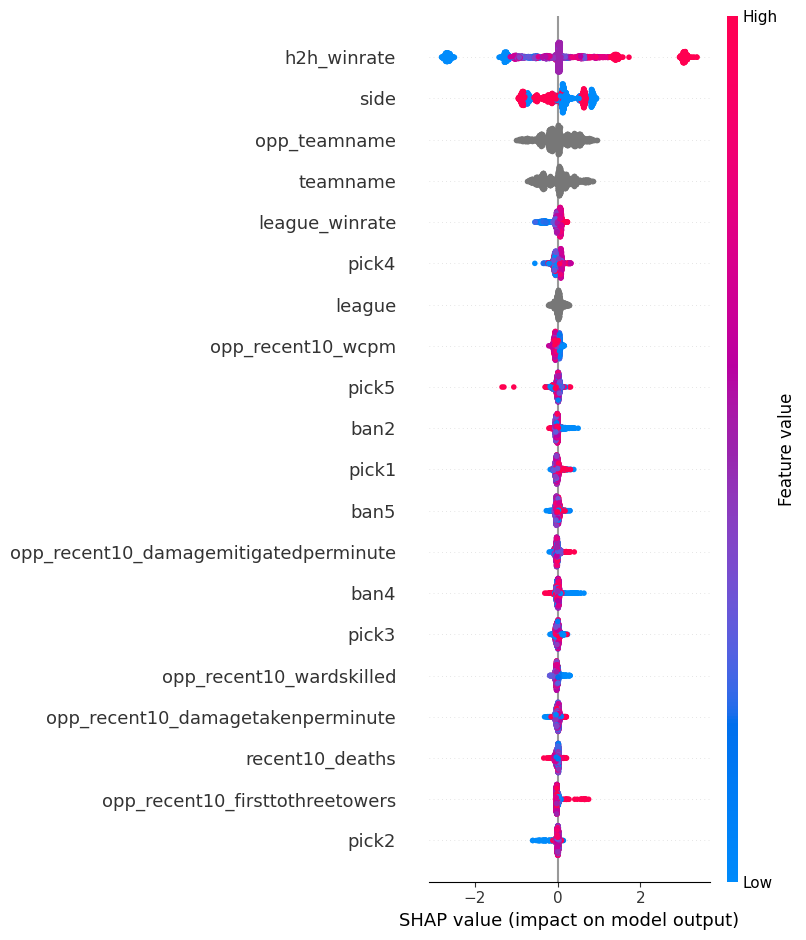

In [20]:
import shap

explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(valid_x)

shap.summary_plot(shap_values, valid_x)